<a href="https://colab.research.google.com/github/Mehul6112/Data-Science_curve/blob/main/Udemy_course_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'finance-accounting-courses-udemy-13k-course:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F877973%2F1494962%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240423%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240423T110759Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D672748fab692caa73a1221affb34a268b3c2cbbc37c03dcf511dbe8fee059d65ef008fd60953590cc80d98db7f9db9386a3bc20274b0d09e26aca81976a1fb6829c7cba40d505dabccb13b7f1da5531538a99cbde62a7501e82cdbcdf32aeaefd5c14a7d46026044a2300af688d1e62c1f9be08c705dc36f1fd98dd32c02e0804af56d6747684952119ddc8c132c611751c2c2341a875e3768adc1fe5cc4cdbdde783004a479da03f776a88d67dd6c3949be62f9d2ca7ec1f3be0107bb4c47dec37086515e639f668deb41195e020448ea1ce7c517758194dc05d391144109a1c27d215be69f9ee615459c91455d39e5476e4deab6a09e0b8af7882cc7bf4e4b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1023500 bytes downloaded
Downloaded and uncompressed: finance-accounting-courses-udemy-13k-course
Data source import complete.


# **Introduction:**

Welcome to my exciting journey through the world of finance education on Udemy! In this exploration, we'll delve into a rich dataset containing information about various finance courses offered on the popular online learning platform. By leveraging the powerful tools of Python such as pandas, Matplotlib, and Plotly, we aim to uncover valuable insights and trends within this dataset.

## **Data Exploration:**

1. **Data Cleaning:**
    - Load the Udemy finance course dataset into a pandas DataFrame.
    - Identify and handle any missing values or inconsistencies in the data.
    - Remove outliers to ensure the integrity of our analysis.

2. **Exploratory Data Analysis:**
    - Investigate the distribution of course offerings across different categories and topics within finance.
    - Analyze the popularity of courses based on factors such as average ratings, number of reviews, and current pricing.
    - Explore the relationship between course characteristics and subscriber engagement.

## Dependencies

In [28]:
!pip install langdetect
!pip install language_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=40f190ac18cf60f23158eccb3f334879e8ffe67eadae58d30e1618cc17475ef7
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.0 MB/s eta 0:00:00


## Original dataset

In [3]:
df_orignal = pd.read_csv("/kaggle/input/finance-accounting-courses-udemy-13k-course/udemy_output_All_Finance__Accounting_p1_p626.csv")
df_orignal.sample(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
1192,1015188,Fundamentals of Change Management,/course/fundamentals-of-change-management/,True,1465,4.07143,4.08644,4.08644,326,False,27,0,2016-11-18T02:08:11Z,2016-11-19T00:28:02Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
4700,779616,"Fashion Brand Launch: Product ID, Design & Dev...",/course/fashion-brand-launch-product-id-design...,True,2121,4.25000,4.13832,4.13832,33,False,7,0,2016-03-02T03:05:42Z,2016-03-02T17:11:20Z,455.0,INR,₹455,3520.0,INR,"₹3,520"
4180,2386648,Basic Virtual Assisting,/course/basic-virtual-assisting/,True,181,4.63636,4.62355,4.62355,41,False,7,0,2019-05-27T13:48:22Z,2019-07-18T02:27:56Z,700.0,INR,₹700,8640.0,INR,"₹8,640"
5643,886698,Sales for Startups and Entrepreneurs!,/course/sales-for-startups/,True,1029,4.05000,3.98843,3.98843,22,False,13,0,2016-06-23T20:54:23Z,2016-07-15T16:59:23Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
7268,1160200,How To Win Repeat Customers Time And Time Again,/course/how-to-win-repeat-customers-time-and-t...,True,1424,4.20000,4.24817,4.24817,11,False,33,0,2017-03-27T21:24:36Z,2017-09-04T20:20:07Z,455.0,INR,₹455,2240.0,INR,"₹2,240"


In [4]:
df = df_orignal #creating a copy of our dataset

## Pre-processing

### Renaming, dropping & formatting fields

In [5]:
print("Price Detail Currencies:", df['price_detail__currency'].unique())

print("\nValue Counts of Price Detail Currencies:", df['price_detail__currency'].value_counts())

print("\nDiscount Price Currencies:", df['discount_price__currency'].unique())

print("\nValue Counts of Discount Price Currencies:", df['discount_price__currency'].value_counts())

print("\nValue Counts of wishlisted courses: ", df["is_wishlisted"].value_counts())

print("\nValue Counts of practice tests: ", df.num_published_practice_tests.value_counts())

Price Detail Currencies: ['INR' nan]

Value Counts of Price Detail Currencies: price_detail__currency
INR    13111
Name: count, dtype: int64

Discount Price Currencies: ['INR' nan]

Value Counts of Discount Price Currencies: discount_price__currency
INR    12205
Name: count, dtype: int64

Value Counts of wishlisted courses:  is_wishlisted
False    13608
Name: count, dtype: int64

Value Counts of practice tests:  num_published_practice_tests
0    13008
2      214
1      202
6       67
5       43
3       39
4       35
Name: count, dtype: int64


In [6]:
df[["discount_price__amount", "discount_price__price_string", "price_detail__amount", "price_detail__price_string"]].sample(5)

,discount_price__amount,discount_price__price_string,price_detail__amount,price_detail__price_string
1121,455.0,₹455,8640.0,"₹8,640"
5186,455.0,₹455,3200.0,"₹3,200"
11585,NaN,NaN,NaN,NaN
13361,455.0,₹455,2560.0,"₹2,560"
3753,455.0,₹455,4800.0,"₹4,800"


* We observed that the majority of the data pertains to either Indian Rupees (INR) or contains no value (NaN). Since these columns offer little insight into our analysis, we will remove them. Similarly, columns like "id" and "url" do not contribute significantly to our understanding of the data and will be dropped as well.

* We observe that the string fields serve as symbolic representations of their corresponding discount_price and price_detail amounts, respectively. Furthermore, these string fields exhibit an equal number of NaN values. Hence, it is appropriate to remove them entirely from the dataset.

* Since there are no courses that are wishlisted in this dataset then let's just drop this field. Also, courses that are free have some current price which should have been ideally zero.

* Most finance courses available on udemy dont have tests for their subscribers to practice.

* Moreover, the "created" and "published_time" fields contain datetime format data rather than the object data type. We'll convert these fields to the appropriate datetime format.

In [7]:
df = df.drop(columns = ["id", "url", "price_detail__currency", "discount_price__currency", "discount_price__price_string","price_detail__price_string", "is_wishlisted"])
df.created = pd.to_datetime(df.created)
df.published_time = pd.to_datetime(df.published_time)
df.rename(columns={'discount_price__amount': 'current_price', 'price_detail__amount': "orignal_price", 'num_subscribers':"subscribers"}, inplace=True)
df.loc[df['is_paid'] == False, 'current_price'] = 0

In [8]:
df.dtypes

title                                        object
is_paid                                        bool
subscribers                                   int64
avg_rating                                  float64
avg_rating_recent                           float64
rating                                      float64
num_reviews                                   int64
num_published_lectures                        int64
num_published_practice_tests                  int64
created                         datetime64[ns, UTC]
published_time                  datetime64[ns, UTC]
current_price                               float64
orignal_price                               float64
dtype: object

### Handling Null values

In [9]:
df.isnull().sum()

title                             0
is_paid                           0
subscribers                       0
avg_rating                        0
avg_rating_recent                 0
rating                            0
num_reviews                       0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
current_price                   907
orignal_price                   497
dtype: int64

In [10]:
df = df.interpolate()
df.isna().sum()

title                           0
is_paid                         0
subscribers                     0
avg_rating                      0
avg_rating_recent               0
rating                          0
num_reviews                     0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
current_price                   0
orignal_price                   0
dtype: int64

In [11]:
df.describe()

,subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,current_price,orignal_price
count,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000
mean,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,476.277741,4719.647266
std,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,276.566197,3206.448904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1280.000000
25%,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1600.000000
50%,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


### Correlation

Content Depth Analysis: Exploring the relationship between the number of published lectures and course ratings. Determining whether courses with a higher number of lectures tend to have better ratings and higher subscriber engagement.

In [12]:
df[["avg_rating", "avg_rating_recent", "subscribers", "num_reviews", "num_published_lectures"]].corr()

,avg_rating,avg_rating_recent,subscribers,num_reviews,num_published_lectures
avg_rating,1.000000,0.989222,0.082100,0.068631,0.116836
avg_rating_recent,0.989222,1.000000,0.084198,0.069347,0.113875
subscribers,0.082100,0.084198,1.000000,0.784190,0.211672
num_reviews,0.068631,0.069347,0.784190,1.000000,0.179063
num_published_lectures,0.116836,0.113875,0.211672,0.179063,1.000000


There is a very high correlation between different rating metrics but it seems that they do not relate to number of reviews that much.
Similarly, number of subscribers is highly correlated with number of reviews.

### New fields

In [13]:
# Defining the bins and labels for the categories
bins = [0, 2.5, 3.9, 4.3, 4.8, 5]
labels = ['Poor', 'Below Average', 'Above Average', 'Good', 'Excellent']
# Creating a new column to categorize courses based on avg-rating
df['rating_category'] = pd.cut(df['avg_rating'], bins=bins, labels=labels, right=False)
df[["avg_rating", "rating_category"]].sample(10)

,avg_rating,rating_category
8145,4.21429,Above Average
11833,4.08333,Above Average
6828,3.55000,Below Average
4789,4.40000,Good
6935,4.80000,Excellent
10818,4.75000,Good
620,4.32609,Good
3915,4.45000,Good
5864,4.40000,Good
5813,3.50000,Below Average


In [14]:
df['total_sales'] = df['subscribers'] * df['current_price']
paid_courses = df[df['is_paid'] == True]
free_courses = df[df["is_paid"] == False]

### Handling duplicate courses

We can see there are many similar courses so let's fitler them out and keep our courses distinct.

In [15]:
duplicates = df.duplicated(subset=['title'])
print("Number of Duplicate titles:", df[duplicates]['title'].shape)


Number of Duplicate titles: (45,)


In [16]:
df = df[~duplicates]
#checking again to see if it worked
duplicates = df.duplicated(subset=['title'])
print("Number of Duplicate titles:", df[duplicates]['title'].shape)

Number of Duplicate titles: (0,)


Now our data is consistent. Next, let's visualise how many finance courses are paid.

## **Visualization:**

1. **Data Visualization:**
    - Utilize Matplotlib and Plotly to create engaging visualizations that highlight key insights from our data exploration.
    - Generate bar charts, scatter plots, and box plots to illustrate trends and patterns in course popularity, ratings, and pricing.
    - Ensure that the visualizations are clear, informative, and visually appealing.

2. **Interactive Visualization:**
    - Harness the interactive capabilities of Plotly to create dynamic dashboards and plots.
    - Allow users to interactively explore the dataset, filter courses based on their preferences, and gain deeper insights into finance education trends on Udemy.

### Distribution of Current Prices Across Rating Categories

In [17]:
fig = go.Figure(data=go.Violin(y=paid_courses['current_price'],x = paid_courses["rating_category"],
                                box_visible=True,
                                line_color='blue',
                                meanline_visible=True,
                                fillcolor='lightblue',
                                opacity=0.6,
                                hoverinfo='y+name'))
fig.update_layout(
    title='Distribution of Current Prices Across Rating Categories',
    xaxis_title='Rating Category',
    yaxis_title='Current Price',
    yaxis=dict(range=[400, 700]),
    height=400,
    width=1000,
)

fig.show()

### Countplot for paid vs free courses

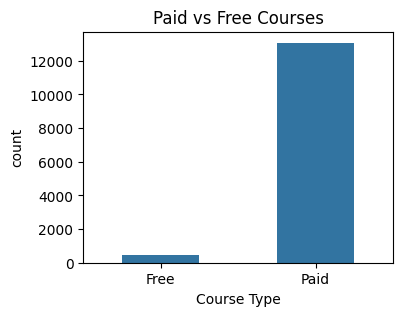

In [18]:
plt.figure(figsize = (4,3))
# Countplot for paid vs. free courses
sns.countplot(data=df, x='is_paid', width=0.5)
plt.title('Paid vs Free Courses')
plt.xlabel('Course Type')
plt.xticks([0, 1], labels = ['Free', 'Paid'])
plt.show()

### Finance Courses Created Over Time

In [31]:
# Course Creation or Publication Over Time
# Aggregate the data by year and count the number of courses created or published each year
courses_over_time = df.groupby(df['created'].dt.year)['title'].count()

# Create a line plot to visualize the trend of course creation or publication over time
fig_time_series = go.Figure(data=go.Scatter(x=courses_over_time.index, y=courses_over_time.values,
                                            mode='lines+markers', marker=dict(color='blue'),
                                            name='Courses Created or Published'))

fig_time_series.update_layout(title='Finance Courses Created Over Time',
                              xaxis_title='Year', yaxis_title='Number of Courses',
                              height=500, width=900)
fig_time_series.show()

### Distribution of Number of Lectures

In [20]:
fig = go.Figure(go.Violin(
    y=df['num_published_lectures'],
    box_visible=True,
    line_color='blue',
    meanline_visible=True,
    fillcolor='lightblue',
    opacity=0.6
))

# Update layout
fig.update_layout(
    title='Distribution of Number of Published Lectures',
    yaxis_title='Number of Published Lectures',
    yaxis=dict(range=[0, 100]),
    height=500,
    width=800
)

# Show plot
fig.show()


### Distribution of time taken from course creation to publication

In [21]:
# Distribution of Time to Publication
# Calculate the time taken from course creation to publication (in days)
df['time_to_publication'] = (df['published_time'] - df['created']).dt.days

# Create a violin plot to visualize the distribution of time to publication
fig_time_to_publication_violin = go.Figure(data=go.Violin(y=df['time_to_publication'],
                                                          box_visible=True,
                                                          line_color='blue',
                                                          meanline_visible=True,
                                                          fillcolor='lightblue',
                                                          opacity=0.6,
                                                          hoverinfo='y+name'))


fig_time_to_publication_violin.update_layout(title='Distribution of Time to Publication for Finance Courses',
                                              yaxis_title='Time to Publication (Days)',
                                              yaxis=dict(range=[-1, 200]),
                                              height=500, width=900)

fig_time_to_publication_violin.show()

### Popular courses

In [22]:
top_paid_courses = paid_courses.nlargest(5, 'subscribers')
top_free_courses = free_courses.nlargest(5, 'subscribers')

fig_paid = go.Figure(go.Bar(
    x=top_paid_courses['subscribers'],
    y=top_paid_courses['title'],
    orientation='h',
    marker=dict(color='crimson')
))
fig_paid.update_layout(
    title='Top 5 Most Subscribed Paid Courses',
    xaxis_title='Subscribers',
    yaxis_title=None,
    height=400,
    width=1100
)
fig_free = go.Figure(go.Bar(
    x=top_free_courses['subscribers'],
    y=top_free_courses['title'],
    orientation='h',
    marker=dict(color='olive')
))
fig_free.update_layout(
    title='Top 5 Most Subscribed Free Courses',
    xaxis_title='Subscribers',
    yaxis_title=None,
    height=400,
    width=1100
)

# Show plots
fig_paid.show()
fig_free.show()


### Courses with highest revenue

In [23]:
# Sort the DataFrame based on total sales in descending order and select top 7 courses
top_7_courses = paid_courses.nlargest(7, 'total_sales')

# Create a horizontal bar chart to visualize the top 7 courses with the highest sales
fig = go.Figure(go.Bar(
    x=top_7_courses['total_sales'],
    y=top_7_courses['title'],
    orientation='h',
    marker=dict(color='crimson')
))

# Update layout
fig.update_layout(
    title='Top 7 Courses with the Highest Sales on Udemy',
    xaxis_title='Total Sales (INR)',
    yaxis_title=None,
    height=400,
    width=1200,
    bargap=0.2
)

# Show plot
fig.show()


### Average Rating vs. Number of Reviews

In [24]:
fig = px.scatter(df, x='avg_rating', y='num_reviews', color='rating_category', opacity=0.7,
                 title='Average Rating vs. Number of Reviews',
                 labels={'avg_rating': 'Average Rating', 'num_reviews': 'Number of Reviews'},
                 hover_name='title', hover_data={'avg_rating': True, 'num_reviews': True})

# Customize the layout
fig.update_layout(title_x=0.5, height=400, width=1000,
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True))
fig.show()


### Distribution of Courses by Rating Category

In [25]:

# Count the number of courses in each rating category
rating_counts = df['rating_category'].value_counts()

# Create a custom color scale
colors = px.colors.qualitative.Set1

# Create a horizontal bar chart
fig = go.Figure(go.Bar(
    x=rating_counts.values,
    y=rating_counts.index,
    orientation='h',
    marker=dict(color=colors[:len(rating_counts)]),
))

# Update layout
fig.update_layout(
    title='Distribution of Courses by Rating Category',
    xaxis_title='Count',
    yaxis_title='Course rating category',
    height=500,
    width=800
)

# Show plot
fig.show()


### Impact of Reviews

In [26]:
def create_scatter_plot(df, rating_categories, title):
    fig = go.Figure()
    for category in rating_categories:
        df_category = df[df['rating_category'] == category]
        correlation = df_category['num_reviews'].corr(df_category['avg_rating'])
        fig.add_trace(go.Scatter(x=df_category['num_reviews'], y=df_category['avg_rating'],
                                 mode='markers', marker=dict(size=8, opacity=0.7),
                                 name=f'{category} courses (Corr: {correlation:.2f})',
                                 text=[f'Corr: {correlation:.2f}' for _ in range(len(df_category))]))
    fig.update_layout(title=title, xaxis_title='Number of Reviews', yaxis_title='Average Rating',
                      height=400, width=900)
    fig.show()

create_scatter_plot(free_courses, free_courses['rating_category'].unique(),
                    'Impact of Reviews on Average Rating for Free courses')
create_scatter_plot(paid_courses, paid_courses['rating_category'].unique(),
                    'Impact of Reviews on Average Rating for Paid courses')


We can confidently say that number of reviews do not impact average ratings in any way across diferent categories.

In [29]:
import langdetect
import langcodes
# Function to detect language of a title
def detect_language(title):
    try:
        return langdetect.detect(title)
    except:
        return 'Unknown'

# Function to map short forms to full names
def map_language(short_form):
    try:
        return langcodes.Language.make(short_form).language_name().title()
    except langcodes.LanguageValueError:
        return 'Unknown'

# Apply language detection to title and mapping to language field
df['language'] = df['title'].apply(detect_language).apply(map_language)

### Language Analysis

In [30]:
language_counts = df['language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

language_counts = language_counts.sort_values(by='Count', ascending=False)
top_languages = language_counts.head(3)
other_languages_count = language_counts['Count'].sum() - top_languages['Count'].sum()

labels_pie = top_languages['Language'].tolist() + ['Others']
values_pie = top_languages['Count'].tolist() + [other_languages_count]

fig_pie = go.Figure(data=[go.Pie(labels=labels_pie, values=values_pie, hole=0.5)])

fig_pie.update_layout(
    title='Top 3 Languages in Finance Courses',
    width=600,
    height=400,
    showlegend=True
)

fig_pie.show()

language_counts_treemap = language_counts.iloc[3:]

fig_treemap = px.treemap(language_counts_treemap, path=['Language'], values='Count', title="Let's zoom on 'other'")

# Show treemap
fig_treemap.show()
